In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

import umap

from scipy.stats import f_oneway

### Load and explore dataset

In [3]:
wine_df = pd.read_csv("winequality-red.csv")

In [4]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# checking for nan values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# number of unique entries for each column
wine_df.apply(lambda num_unique: len(num_unique.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

<BarContainer object of 6 artists>

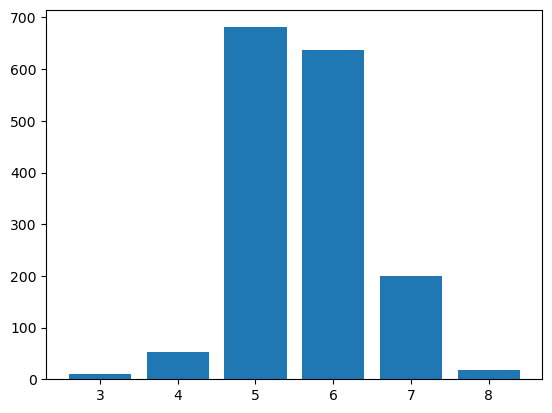

In [8]:
plt.bar(wine_df["quality"].unique(),wine_df["quality"].value_counts())

Quality varies between 3 to 8 mainly, with highest concentration at 5 and 6.

In [9]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

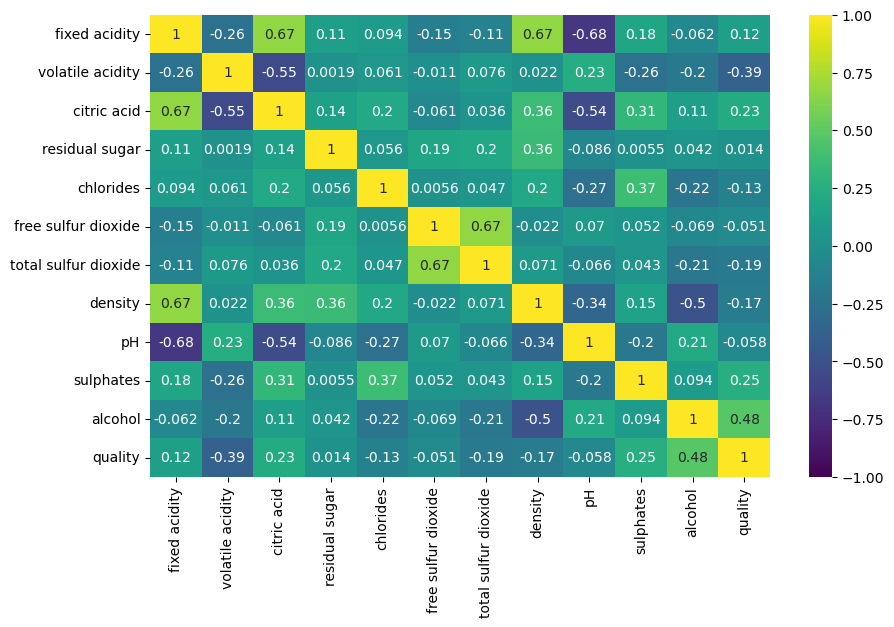

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(wine_df.corr(), vmin=-1, vmax=1, annot=True, cmap="viridis")

### Some observations:
1. The alcohol level and quality seems to have the highest correlation.
2. High volatile acidity and quality are negatively correlated. 
3. Sulphates also show a minor positive correlation with quality.
4. Density has a minor negative correlation with quality.
5. There are some strongly correlated features like- Fixed Acidity and Citric Acid, Total Sulfur Dioxide vs. Free Sulfur Dioxide etc.

### Checking the distribution of data

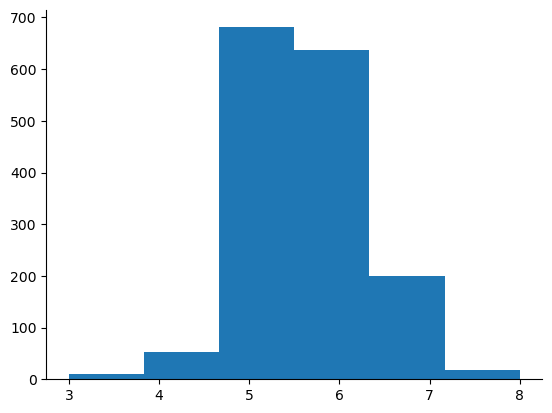

In [11]:
plt.hist(wine_df["quality"], len(wine_df["quality"].unique()))
sns.despine()

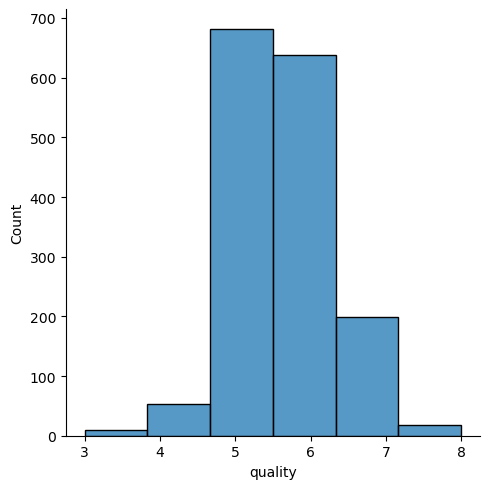

In [12]:
sns.displot(wine_df["quality"], bins=len(wine_df["quality"].unique()))

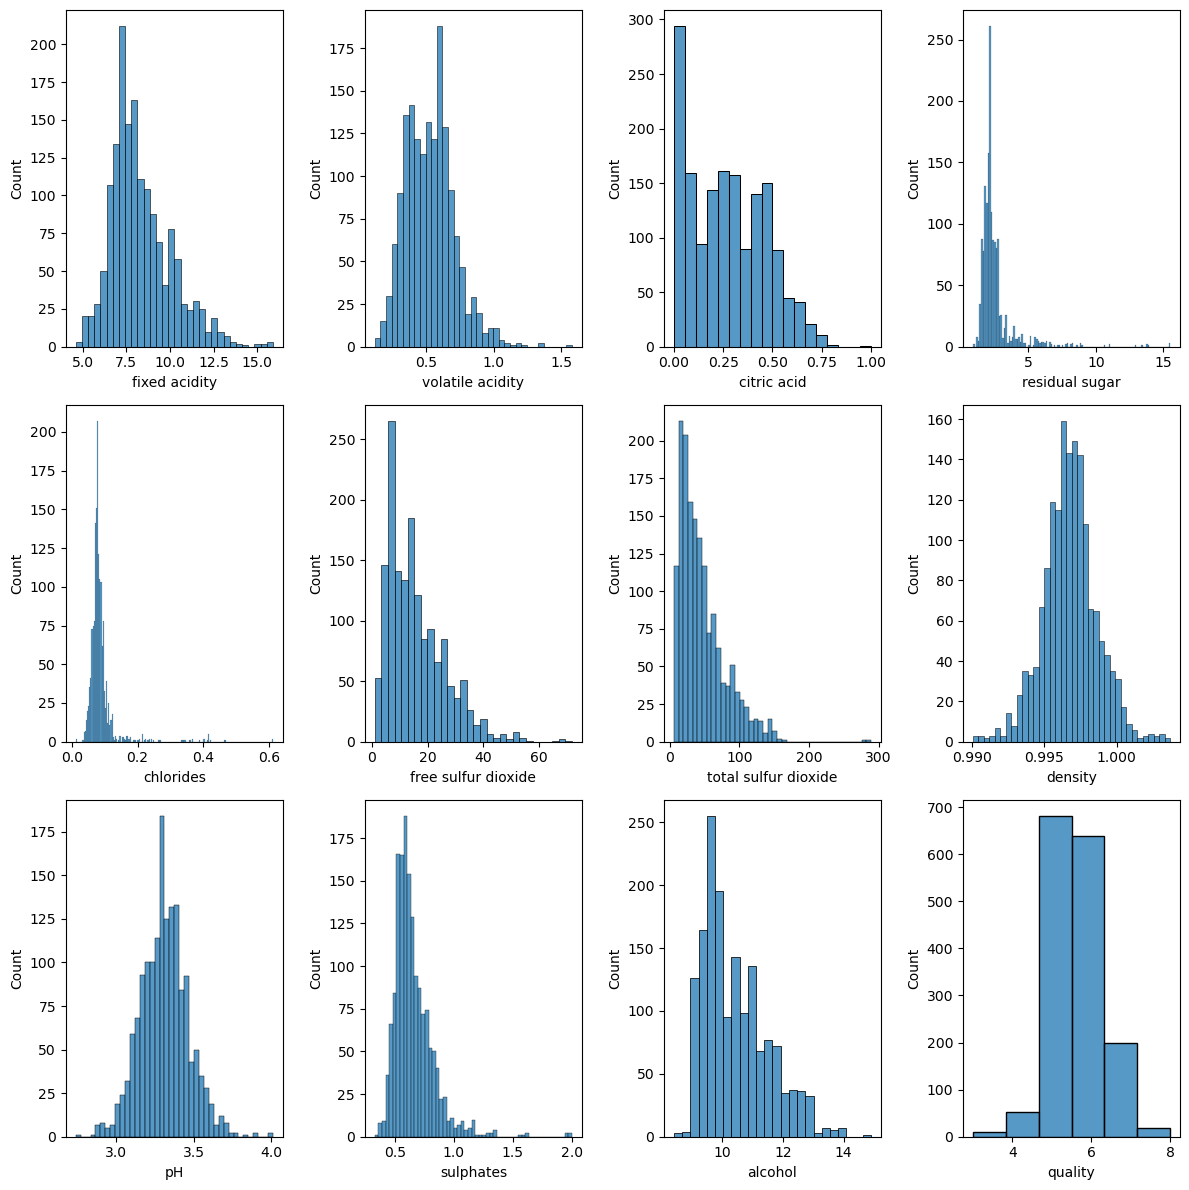

In [13]:


fig, axes = plt.subplots(figsize=(12,12),nrows=3, ncols=4)
names = wine_df.columns

for name, ax in zip(names, axes.flatten()):
    if name == "quality":
        sns.histplot(wine_df["quality"], bins=len(wine_df["quality"].unique()), ax=ax)
    else:
        sns.histplot(wine_df[name], ax=ax)
    # to zoom in and out on x axis accordingly
    # ax.set_xlim(wine_df[name].min(), wine_df[name].max())
plt.tight_layout()


### Some observations about the distributions:
1. Most features are quite skewed except pH and density. 
2. If we are trying to model a quality preditiction model, then the classes are imbalanced.
3. The residual sugar feature is highly skewed. Not many highly sweet wines in the dataset


In [ ]:
# new dataset with all but the quality column
truncated_df = wine_df.drop("quality", axis=1)
truncated_df.tail()

# quality df
wine_quality = wine_df["quality"]


In [ ]:
# standardizing data
scaler = StandardScaler()
wine_std = scaler.fit_transform(truncated_df)



### PCA

In [ ]:
# quality_std = scaler.fit_transform(quality)
pca = PCA(n_components = 2)
wine_pca = pca.fit_transform(wine_std)


Text(0.5, 1.0, 'PCA of Wine Dataset')

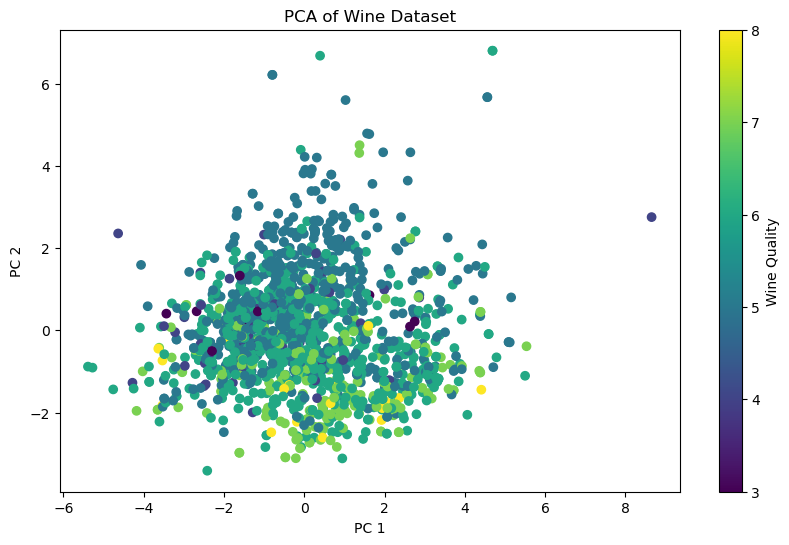

In [51]:
# plot the components
fig = plt.figure(figsize=(10,6))
scatter= plt.scatter(wine_pca[:,0],wine_pca[:, 1], c = wine_quality, cmap= "viridis")
plt.colorbar(scatter, label="Wine Quality")  
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of Wine Dataset")

### t-SNE

In [ ]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)

Text(0.5, 1.0, 'tSne of Wine Dataset')

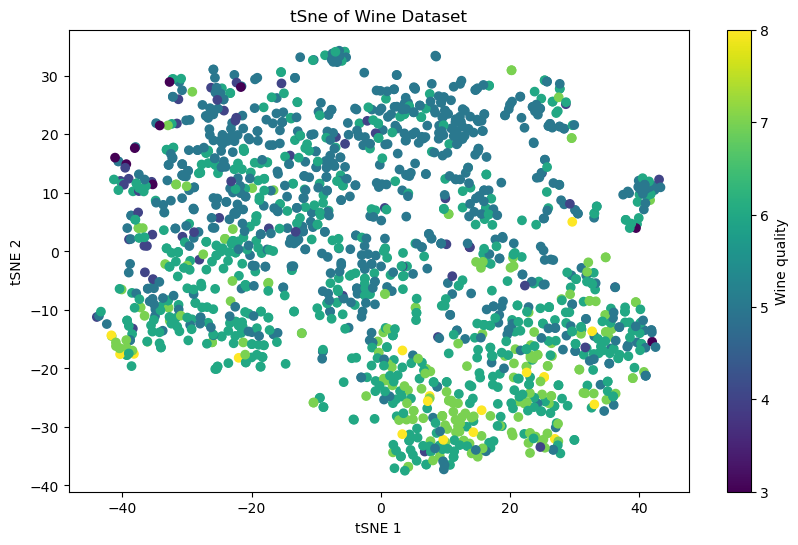

In [57]:
wine_tsne = tsne.fit_transform(wine_std)

plt.figure(figsize=(10,6))

tsne_scatter = plt.scatter(wine_tsne[:, 0], wine_tsne[:, 1],
                      c = wine_quality, cmap = "viridis"
                      )
plt.colorbar(tsne_scatter, label = "Wine quality")
plt.xlabel("tSNE 1")
plt.ylabel("tSNE 2")
plt.title("tSne of Wine Dataset")

### UMAP 

In [60]:
map = umap.UMAP(n_components = 2)

Text(0.5, 1.0, 'UMAP projection of Wine Dataset')

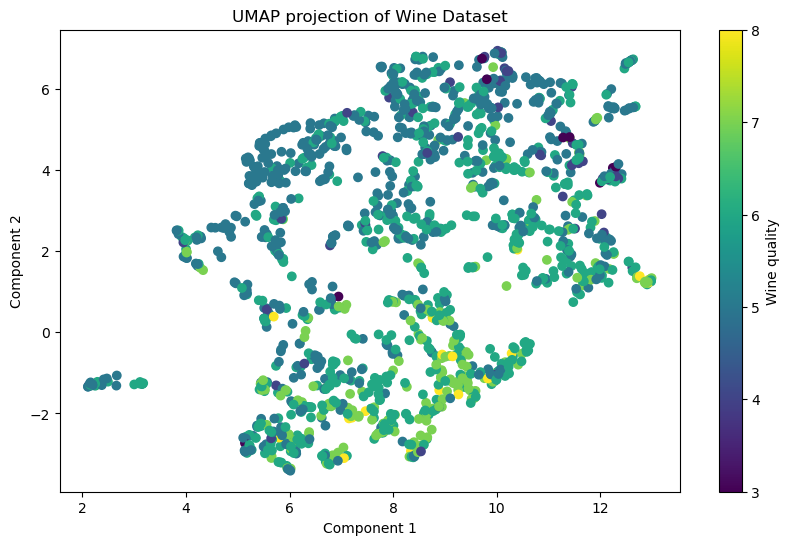

In [62]:
wine_umap = map.fit_transform(wine_std)

plt.figure(figsize=(10,6))

umap_scatter = plt.scatter(wine_umap[:, 0], wine_umap[:, 1],
                      c = wine_quality, cmap = "viridis"
                      )
plt.colorbar(umap_scatter, label = "Wine quality")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("UMAP projection of Wine Dataset")

### Plotting all three projctions together

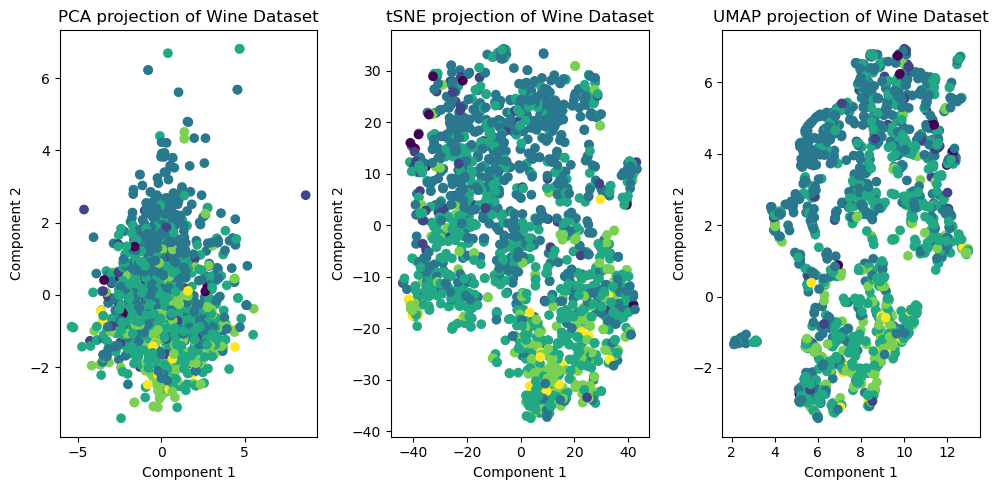

In [78]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=3)
titles = ["PCA", "tSNE", "UMAP"]
dfs = [wine_pca, wine_tsne, wine_umap]

for t, data, a in zip(titles, dfs, axes.flatten()):
    sc = a.scatter(data[:, 0], data[:, 1], 
                    c = wine_quality, cmap = "viridis")
    a.set_xlabel("Component 1")
    a.set_ylabel("Component 2")
    a.set_title(f"{t} projection of Wine Dataset")

plt.tight_layout()

### Hypothesis testing with wine data

In [84]:
# null_hypo: alcohol percentage does not influence wine quality
quality_groups = [group["alcohol"] for _, group in wine_df.groupby("quality")]

# anova because we have a continuous values for alcohol content and 
# discrete categorical labels for quality
f_stat, p_value = f_oneway(*quality_groups)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("We can reject the null hypothesis. The alcohol content significantly influences wine quality.")
else:
    print("We fail to reject the null hypothesis. No significant relationship is observed between alcohol content and wine quality.")

F-statistic: 115.85479746682736
P-value: 1.2098951580566747e-104
We can reject the null hypothesis. The alcohol content significantly influences wine quality.
